In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
from  sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('raw_data.csv')
df = df.dropna(axis = 0, how = 'all')

In [3]:
df.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,KFF - Custom State Reports
NaN,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Dist. of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Iowa,Indiana,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin
Medicaid,19.5%,21.3%,21.0%,26.2%,25.3%,16.8%,21.5%,20.4%,25.5%,17.4%,17.3%,17.6%,15.6%,18.2%,19.5%,17.7%,13.9%,25.5%,29.3%,20.0%,18.7%,22.1%,21.7%,16.9%,24.2%,14.4%,20.8%,12.6%,17.8%,13.2%,16.6%,32.7%,25.7%,17.9%,12.2%,20.0%,17.0%,20.8%,20.2%,20.5%,18.8%,12.8%,19.5%,15.9%,9.3%,23.9%,13.5%,19.8%,26.6%,16.1%
Medicare,16.0%,10.0%,16.1%,15.9%,11.4%,12.8%,14.1%,17.3%,8.2%,18.0%,12.6%,15.9%,15.0%,14.1%,15.6%,14.8%,15.0%,15.8%,13.7%,18.3%,13.3%,13.1%,15.9%,14.7%,14.2%,16.4%,18.1%,14.2%,14.0%,17.7%,13.8%,15.0%,13.0%,15.3%,13.8%,15.9%,15.1%,16.2%,16.3%,14.6%,16.8%,16.1%,15.0%,10.9%,10.0%,17.5%,14.8%,13.9%,19.0%,15.5%
Uninsured,9.7%,11.5%,11.1%,9.1%,7.8%,7.8%,5.9%,6.6%,3.6%,13.1%,13.4%,4.1%,10.5%,7.3%,4.7%,8.8%,9.2%,6.4%,8.9%,8.1%,5.9%,3.0%,5.8%,4.8%,12.9%,10.1%,8.3%,7.9%,11.5%,6.4%,7.9%,9.8%,5.3%,11.4%,7.4%,6.7%,14.9%,7.1%,5.7%,4.3%,10.8%,9.6%,10.2%,18.4%,9.6%,4.4%,8.0%,6.6%,6.6%,5.8%
Medicaid,146%,205%,161%,214%,213%,200%,263%,217%,324%,196%,225%,196%,138%,213%,380%,213%,171%,200%,138%,214%,264%,205%,200%,283%,199%,201%,162%,199%,165%,201%,199%,255%,223%,201%,162%,205%,138%,190%,220%,195%,199%,138%,200%,203%,144%,213%,148%,198%,190%,306%


In [4]:
df = df.transpose()
df = df.reset_index(drop = True)

In [5]:
df2 = df.columns.to_frame()
df2 = df2.transpose()
df2.columns = df2.iloc[0]
df2.drop(axis = 1, index = 0, inplace = True)
df2.drop(columns = ['Unborn Child Option (CHIP-Funded)'], inplace= True)
df2.head()

,NaN,Medicaid,Medicare,Uninsured,Medicaid,Medicare Beneficiaries as a Share of Total Population,Abortion Rate,Total Health Spending,Expenses per Inpatient Day,Employee Contribution,...,Asian,American Indian/Alaska Native,Multiple Races,Total,Total,Median Annual Household Income,Governor Political Affiliation,State Senate Majority Political Affiliation,State House Majority Political Affiliation,Unemployed
1,Alabama,19.5%,16.0%,9.7%,146%,21%,6.8,"$35,263","$1,657.36","$1,676",...,1.4%,0.4%,1.9%,100.0%,14.8%,"$51,734",Republican,Republican,Republican,3.3%
2,Alaska,21.3%,10.0%,11.5%,205%,13%,8.8,"$8,151","$2,397.02","$1,334",...,6.0%,15.1%,8.3%,100.0%,10.1%,"$75,463",Republican,Republican,Republican,6.6%
3,Arizona,21.0%,16.1%,11.1%,161%,18%,9.0,"$43,356","$2,751.38","$1,554",...,3.3%,3.9%,2.4%,100.0%,12.6%,"$62,055",Republican,Republican,Republican,6.8%
4,Arkansas,26.2%,15.9%,9.1%,214%,21%,5.3,"$21,980","$1,882.51","$1,470",...,1.6%,0.6%,2.4%,100.0%,15.6%,"$48,952",Republican,Republican,Republican,4.4%
5,California,25.3%,11.4%,7.8%,213%,16%,NR,"$291,989","$3,726.43","$1,242",...,14.7%,0.4%,3.3%,100.0%,10.6%,"$80,440",Democrat,Democrat,Democrat,7.7%


In [6]:
wyoming = pd.read_csv('wyoming.csv')
wyoming.dropna(axis = 0, how = 'all', inplace = True)
wyoming = wyoming.transpose()
wyoming.reset_index(drop = True, inplace = True)
wyoming.head()


,NaN,Medicaid,Medicare,Uninsured,Medicaid,Medicare Beneficiaries as a Share of Total Population,Abortion Rate,Total Health Spending,Expenses per Inpatient Day,Employee Contribution,...,Asian,American Indian/Alaska Native,Multiple Races,Total,Total,Median Annual Household Income,Governor Political Affiliation,State Senate Majority Political Affiliation,State House Majority Political Affiliation,Unemployed
0,Wyoming,11.5%,16.2%,12.3%,159%,19%,0.3,"$4,856","$1,382.85","$1,354",...,0.6%,2.2%,2.1%,100.0%,10.5%,"$65,003",Republican,Republican,Republican,5.4%


In [7]:
wisconsin = pd.read_csv('wisconsin.csv')
wisconsin.dropna(axis = 0, how = 'all', inplace = True)
wisconsin = wisconsin.transpose()
wisconsin.reset_index(drop = True, inplace = True)
wisconsin.head()

,NaN,Medicaid,Medicare,Uninsured,Medicaid,Medicare Beneficiaries as a Share of Total Population,Abortion Rate,Total Health Spending,Expenses per Inpatient Day,Employee Contribution,...,Asian,American Indian/Alaska Native,Multiple Races,Total,Total,Median Annual Household Income,Governor Political Affiliation,State Senate Majority Political Affiliation,State House Majority Political Affiliation,Unemployed
0,Wisconsin,16.1%,15.5%,5.8%,306%,20%,6.0,"$50,109","$2,558.29","$1,581",...,3.0%,0.7%,2.0%,100.0%,9.5%,"$64,168",Democrat,Republican,Republican,3.9%


In [8]:
final_df = pd.concat([df2, wisconsin,wyoming], ignore_index = True)

In [9]:
new_col_names = ['State',
 'Medicaid',
 'Medicare',
 'Uninsured',
 'Pregnant_Medicaid_Limit',
 'Medicare_Beneficiaries_in_Population',
 'Abortion_Rate',
 'Total_Health_Spending',
 'Expenses_per_Inpatient_Day',
 'Employee_Contribution',
 'No_Personal_Doctor',
 'White',
 'Black',
 'Hispanic',
 'Asian',
 'AIAN',
 'Multiple_Races',
 'Total_Population',
 'Poverty_Rate',
 'Median_Annual_Household_Income',
 'Governor_Political_Affiliation',
 'State_Senate_Majority_Political_Affiliation',
 'State_House_Majority_Political_Affiliation',
 'Unemployed']

In [10]:
final_df.columns = new_col_names
final_df.drop(columns = ['Total_Population'], inplace = True)
final_df.head()

,State,Medicaid,Medicare,Uninsured,Pregnant_Medicaid_Limit,Medicare_Beneficiaries_in_Population,Abortion_Rate,Total_Health_Spending,Expenses_per_Inpatient_Day,Employee_Contribution,...,Hispanic,Asian,AIAN,Multiple_Races,Poverty_Rate,Median_Annual_Household_Income,Governor_Political_Affiliation,State_Senate_Majority_Political_Affiliation,State_House_Majority_Political_Affiliation,Unemployed
0,Alabama,19.5%,16.0%,9.7%,146%,21%,6.8,"$35,263","$1,657.36","$1,676",...,4.4%,1.4%,0.4%,1.9%,14.8%,"$51,734",Republican,Republican,Republican,3.3%
1,Alaska,21.3%,10.0%,11.5%,205%,13%,8.8,"$8,151","$2,397.02","$1,334",...,7.0%,6.0%,15.1%,8.3%,10.1%,"$75,463",Republican,Republican,Republican,6.6%
2,Arizona,21.0%,16.1%,11.1%,161%,18%,9.0,"$43,356","$2,751.38","$1,554",...,31.8%,3.3%,3.9%,2.4%,12.6%,"$62,055",Republican,Republican,Republican,6.8%
3,Arkansas,26.2%,15.9%,9.1%,214%,21%,5.3,"$21,980","$1,882.51","$1,470",...,7.8%,1.6%,0.6%,2.4%,15.6%,"$48,952",Republican,Republican,Republican,4.4%
4,California,25.3%,11.4%,7.8%,213%,16%,NR,"$291,989","$3,726.43","$1,242",...,39.5%,14.7%,0.4%,3.3%,10.6%,"$80,440",Democrat,Democrat,Democrat,7.7%


In [11]:
percent_cols = ['Medicaid', 'Medicare', 'Uninsured', 'Pregnant_Medicaid_Limit', 
                'Medicare_Beneficiaries_in_Population', 'No_Personal_Doctor', 
                'White','Black', 'Hispanic', 'Asian', 'AIAN', 'Multiple_Races', 'Poverty_Rate',
                'Unemployed']
dollar_cols = ['Total_Health_Spending', 'Expenses_per_Inpatient_Day', 'Employee_Contribution', 'Median_Annual_Household_Income']
                

In [12]:
for pc in percent_cols:
    final_df[pc] = final_df[pc].str.rstrip('%').astype('float') / 100.0

In [13]:
for dol in dollar_cols:
    col_stripped = final_df[dol].str.lstrip('$')
    new_col = []
    for item in col_stripped:
        new_col.append(float(item.replace(',', '')))
    final_df[dol] = new_col

In [14]:
final_df.head()

,State,Medicaid,Medicare,Uninsured,Pregnant_Medicaid_Limit,Medicare_Beneficiaries_in_Population,Abortion_Rate,Total_Health_Spending,Expenses_per_Inpatient_Day,Employee_Contribution,...,Hispanic,Asian,AIAN,Multiple_Races,Poverty_Rate,Median_Annual_Household_Income,Governor_Political_Affiliation,State_Senate_Majority_Political_Affiliation,State_House_Majority_Political_Affiliation,Unemployed
0,Alabama,0.195,0.160,0.097,1.46,0.21,6.8,35263.0,1657.36,1676.0,...,0.044,0.014,0.004,0.019,0.148,51734.0,Republican,Republican,Republican,0.033
1,Alaska,0.213,0.100,0.115,2.05,0.13,8.8,8151.0,2397.02,1334.0,...,0.070,0.060,0.151,0.083,0.101,75463.0,Republican,Republican,Republican,0.066
2,Arizona,0.210,0.161,0.111,1.61,0.18,9.0,43356.0,2751.38,1554.0,...,0.318,0.033,0.039,0.024,0.126,62055.0,Republican,Republican,Republican,0.068
3,Arkansas,0.262,0.159,0.091,2.14,0.21,5.3,21980.0,1882.51,1470.0,...,0.078,0.016,0.006,0.024,0.156,48952.0,Republican,Republican,Republican,0.044
4,California,0.253,0.114,0.078,2.13,0.16,NR,291989.0,3726.43,1242.0,...,0.395,0.147,0.004,0.033,0.106,80440.0,Democrat,Democrat,Democrat,0.077


In [15]:
mmr_data = pd.read_csv('csvData.csv')
mmr_data.rename(columns = {'maternalMortalityRate': 'maternal_mortality_rate'}, inplace = True)
mmr_data.sort_values('State', inplace = True)
mmr_data.head()

,State,maternal_mortality_rate
44,Alabama,36.4
9,Alaska,12.4
40,Arizona,27.3
45,Arkansas,37.5
3,California,4.0


In [16]:
merged_df = pd.merge(final_df, mmr_data, on = 'State')
merged_df.dropna(inplace = True)
merged_df.head()

,State,Medicaid,Medicare,Uninsured,Pregnant_Medicaid_Limit,Medicare_Beneficiaries_in_Population,Abortion_Rate,Total_Health_Spending,Expenses_per_Inpatient_Day,Employee_Contribution,...,Asian,AIAN,Multiple_Races,Poverty_Rate,Median_Annual_Household_Income,Governor_Political_Affiliation,State_Senate_Majority_Political_Affiliation,State_House_Majority_Political_Affiliation,Unemployed,maternal_mortality_rate
0,Alabama,0.195,0.160,0.097,1.46,0.21,6.8,35263.0,1657.36,1676.0,...,0.014,0.004,0.019,0.148,51734.0,Republican,Republican,Republican,0.033,36.4
1,Alaska,0.213,0.100,0.115,2.05,0.13,8.8,8151.0,2397.02,1334.0,...,0.060,0.151,0.083,0.101,75463.0,Republican,Republican,Republican,0.066,12.4
2,Arizona,0.210,0.161,0.111,1.61,0.18,9.0,43356.0,2751.38,1554.0,...,0.033,0.039,0.024,0.126,62055.0,Republican,Republican,Republican,0.068,27.3
3,Arkansas,0.262,0.159,0.091,2.14,0.21,5.3,21980.0,1882.51,1470.0,...,0.016,0.006,0.024,0.156,48952.0,Republican,Republican,Republican,0.044,37.5
4,California,0.253,0.114,0.078,2.13,0.16,NR,291989.0,3726.43,1242.0,...,0.147,0.004,0.033,0.106,80440.0,Democrat,Democrat,Democrat,0.077,4.0


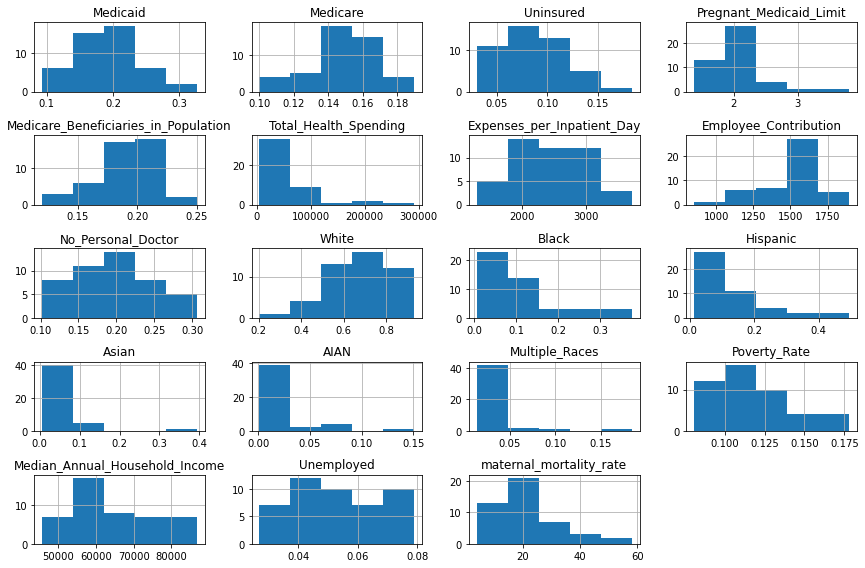

In [17]:
merged_df.hist(bins = 5)
plt.tight_layout()
plt.show()

In [18]:
list_cols = ['Governor_Political_Affiliation', 
                               'State_Senate_Majority_Political_Affiliation', 
                               'State_House_Majority_Political_Affiliation']
for col in list_cols:
    merged_df[col] = [0 if item == 'Republican' else 1 for item in merged_df[col]]
merged_df.head()

,State,Medicaid,Medicare,Uninsured,Pregnant_Medicaid_Limit,Medicare_Beneficiaries_in_Population,Abortion_Rate,Total_Health_Spending,Expenses_per_Inpatient_Day,Employee_Contribution,...,Asian,AIAN,Multiple_Races,Poverty_Rate,Median_Annual_Household_Income,Governor_Political_Affiliation,State_Senate_Majority_Political_Affiliation,State_House_Majority_Political_Affiliation,Unemployed,maternal_mortality_rate
0,Alabama,0.195,0.160,0.097,1.46,0.21,6.8,35263.0,1657.36,1676.0,...,0.014,0.004,0.019,0.148,51734.0,0,0,0,0.033,36.4
1,Alaska,0.213,0.100,0.115,2.05,0.13,8.8,8151.0,2397.02,1334.0,...,0.060,0.151,0.083,0.101,75463.0,0,0,0,0.066,12.4
2,Arizona,0.210,0.161,0.111,1.61,0.18,9.0,43356.0,2751.38,1554.0,...,0.033,0.039,0.024,0.126,62055.0,0,0,0,0.068,27.3
3,Arkansas,0.262,0.159,0.091,2.14,0.21,5.3,21980.0,1882.51,1470.0,...,0.016,0.006,0.024,0.156,48952.0,0,0,0,0.044,37.5
4,California,0.253,0.114,0.078,2.13,0.16,NR,291989.0,3726.43,1242.0,...,0.147,0.004,0.033,0.106,80440.0,1,1,1,0.077,4.0


In [19]:
for index, value in merged_df['Abortion_Rate'].items():
    if value == 'NR':
        merged_df.loc[index, 'Abortion_Rate'] = 11.4
merged_df['Abortion_Rate'] = merged_df['Abortion_Rate'].astype('float64')

merged_df['AIAN'] = merged_df['AIAN'].fillna(0)

In [20]:
predictors  = merged_df.drop(columns = ['State', 'maternal_mortality_rate']).columns

<AxesSubplot:>

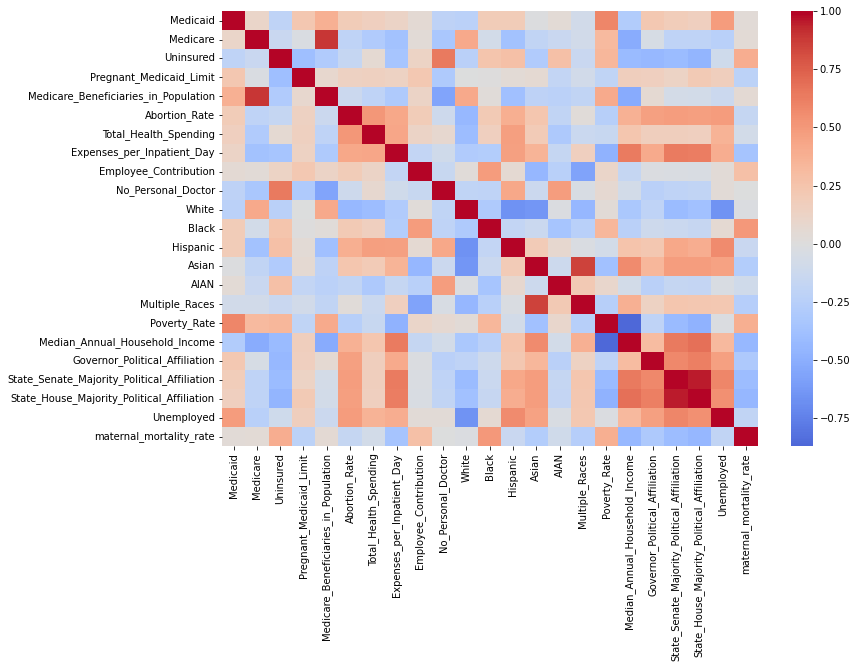

In [21]:
sns.heatmap(merged_df.drop(columns = ['State']).corr(), center=0, cmap='coolwarm')

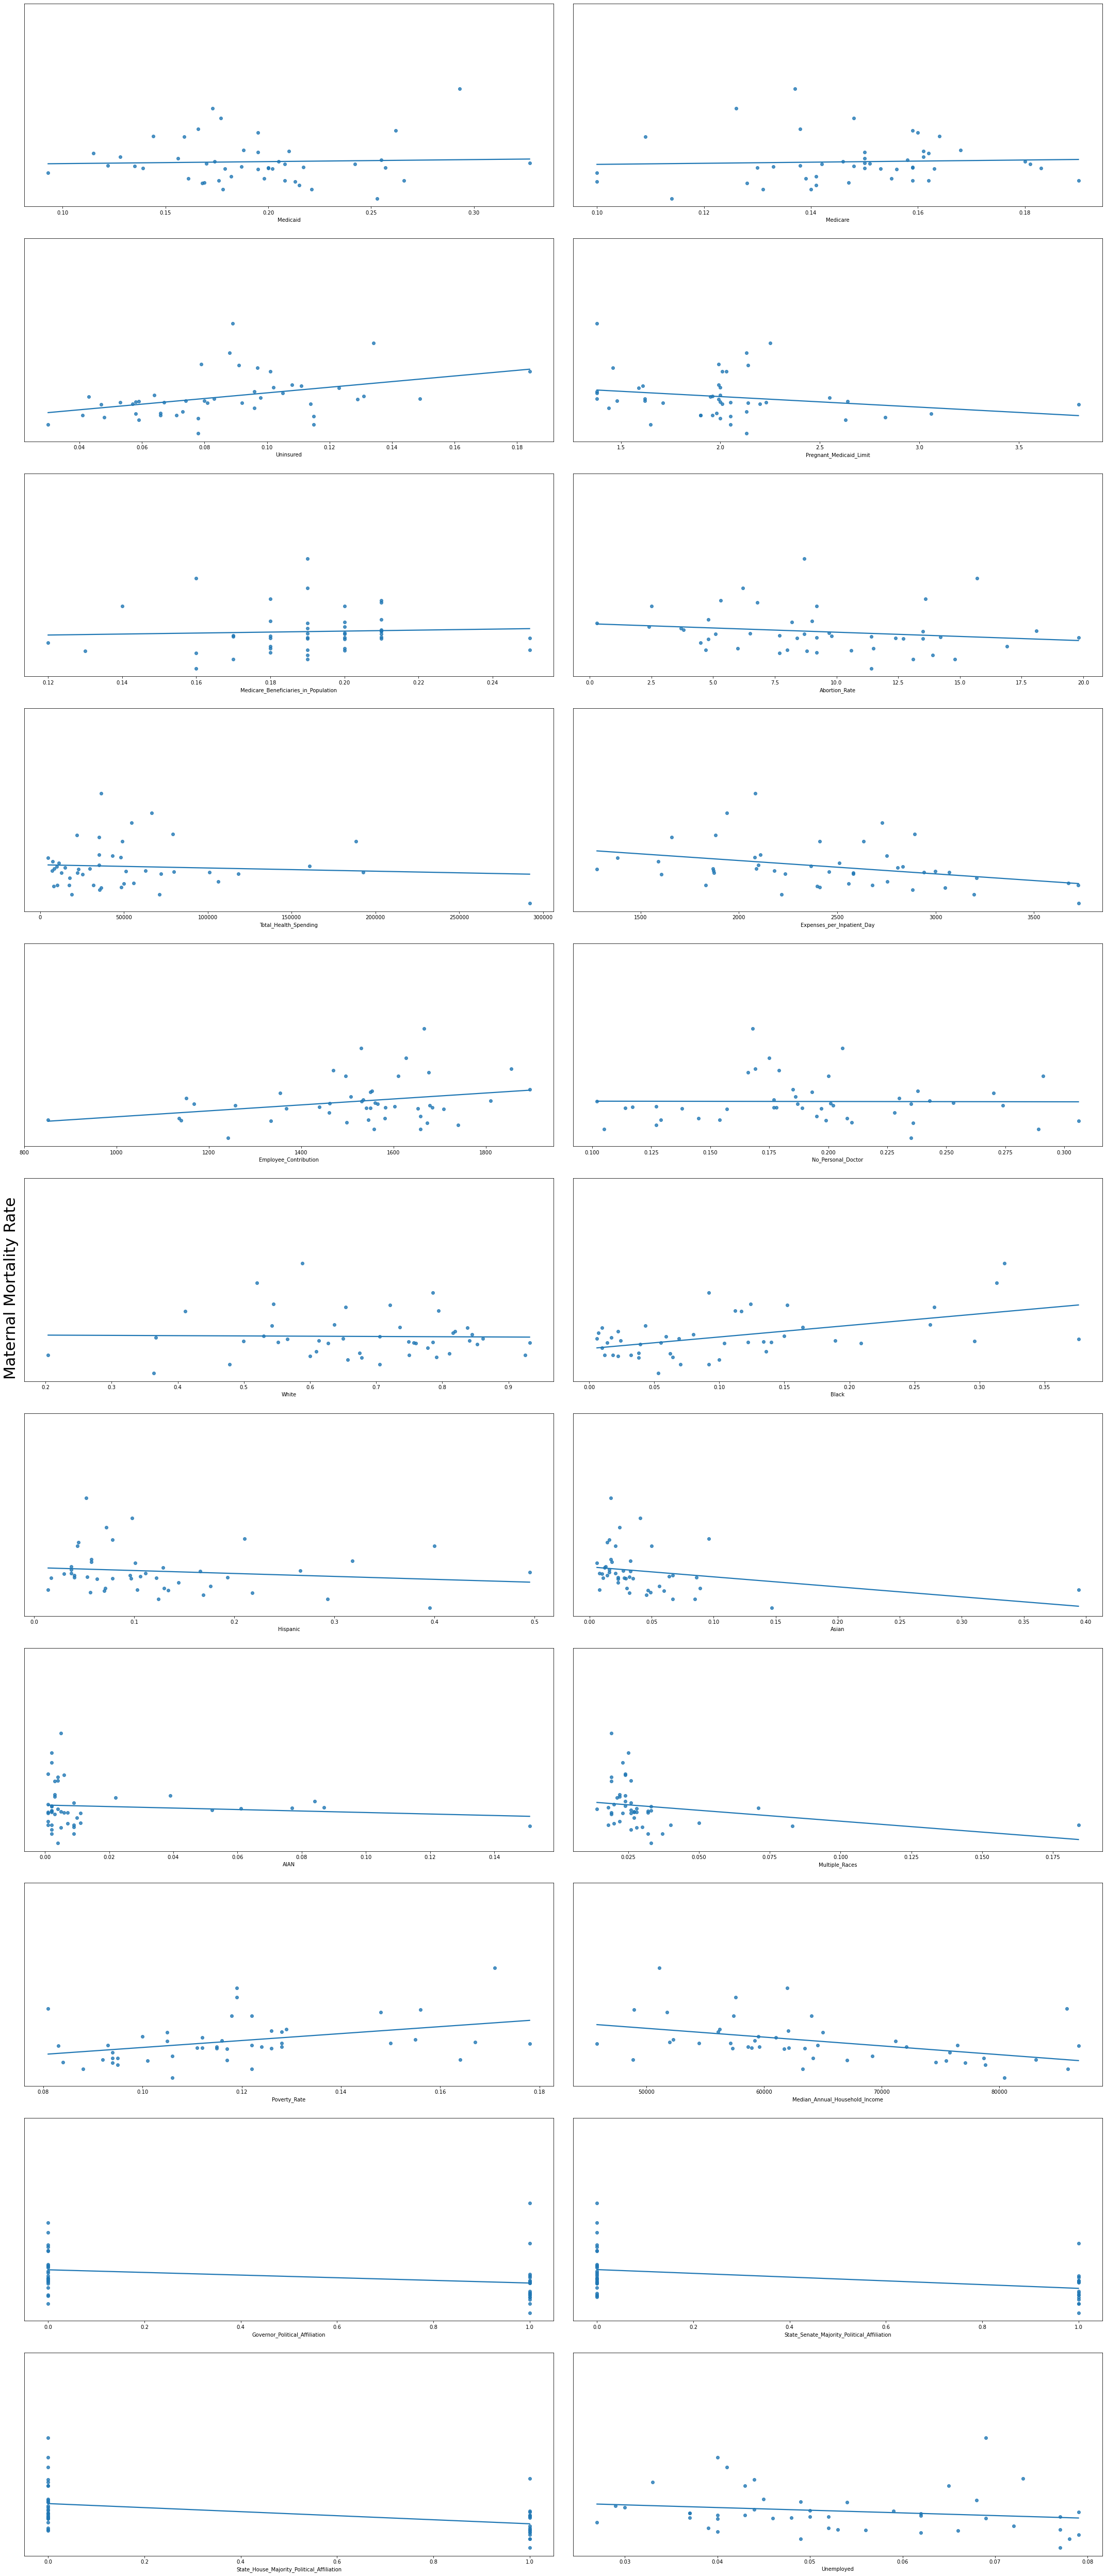

In [33]:
fig, ax = plt.subplots(11,2, figsize = (30,70), sharey = True)
for i, ax in zip(range(22), ax.flat):
    sns.regplot(x = predictors[i], y = 'maternal_mortality_rate', data = merged_df, ax = ax, ci = None)
    ax.set_ylim([0,100])
    ax.axes.yaxis.set_visible(False)
plt.tight_layout(pad = 3)
fig.text(0, 0.5, 'Maternal Mortality Rate', va='center', rotation='vertical', fontsize = 30);

In [34]:
high_corrs = []
for col in merged_df[predictors]:
    correlation = merged_df[col].corr(merged_df['maternal_mortality_rate'])
    if np.abs(correlation)  >= 0.3:
        high_corrs.append(col)
high_corrs

['Uninsured',
 'Expenses_per_Inpatient_Day',
 'Black',
 'Poverty_Rate',
 'Median_Annual_Household_Income',
 'Governor_Political_Affiliation',
 'State_Senate_Majority_Political_Affiliation',
 'State_House_Majority_Political_Affiliation']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(merged_df[high_corrs], merged_df['maternal_mortality_rate'], train_size =  0.8)
lr = LinearRegression().fit(x_train, y_train)
preds = lr.predict(x_test)
r2_score(y_test, preds)

0.397652321963465